# Projet Ouverture à la Recherche
Enseignant : KHEDDOUCI Hamamache

Doctorante : Amira Ben Hadid

Année 2022-2023

TANG Kévin p1501263

VO Anh-Kiet p1907921

TRAN David p1911682

Nous possédons une base de données de personnes ayant réalisé un devis sur un site internet.
Nous voulons savoir lesquels ont le plus de chance de finaliser leur devis pour améliorer la prospection commerciale qui sera faite ensuite.
Et si possible faire ressortir un type de personnalité qui est le plus à même de réaliser l'achat.

## Extraction

In [1]:
import numpy as np
np.set_printoptions(threshold=np.inf)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#Lecture du fichier de données
data = pd.read_csv('./final_data.csv', sep=',')

In [3]:
#Affichage des données
data

,work_id,person_id,is_pro,work_created_at,zip,acquisition_id,work_type_id,volume,work_creator,handling,...,group,plant_id,production_price,transport_price,handling_price,discount_price,total_price,previous_bill_count,client_maturity,priority
0,e86edc0a-5e1b-4e4b-8fdb-497f2596fe6b,0000f5dd-3a7d-46fe-adea-3fd3739ab1ef,0,2021-08-20 10:03:32,95310.0,f91db25c-53b0-4993-94e4-8704b4981c77,e00cd633-2fac-4733-ad1d-50e0a2ac0e78,2.5,Conseillers,1,...,1,ed4ec1c3-683b-455e-a085-c4e45f2f0ada,344.80,78.10,549.30,-54.0,1026.20,0,90D,4
1,95c3066e-ff07-4d77-8a8a-5c4be7e6f086,0001ce75-d1ee-4975-a034-39eee6673d7e,0,2021-10-10 21:28:49,17190.0,f91db25c-53b0-4993-94e4-8704b4981c77,de6dba1f-936e-47aa-9f93-03f5ee76f3b1,15.0,Clients,1,...,1,5e101746-6975-446c-93c2-b363e9421ce4,1633.77,447.12,634.04,0.0,2714.93,0,30D,8
2,ad3cf5c2-5b45-498e-8f40-33f5ab2c8450,00023146-c4fb-49f5-a14a-a26af1c32851,0,2021-08-09 09:32:05,18220.0,f6851d59-f035-4199-9b9e-aba4d33d6995,de6dba1f-936e-47aa-9f93-03f5ee76f3b1,6.0,Conseillers,0,...,1,a13601cc-8c4b-4f31-9f9b-45913b7fe4d9,696.27,168.31,0.00,0.0,864.58,0,30D,6
3,ba4545c2-2d4b-410b-b3b4-5870bc26da28,000375b8-9d09-4a7a-82e4-cd4058a0fb16,0,2022-02-09 18:31:04,78740.0,f91db25c-53b0-4993-94e4-8704b4981c77,e00cd633-2fac-4733-ad1d-50e0a2ac0e78,4.5,Clients,0,...,1,ed4ec1c3-683b-455e-a085-c4e45f2f0ada,503.86,177.87,0.00,0.0,681.73,0,15D,3
4,6c6b3eb6-3369-49f0-bf93-1c7148de12aa,0003d06c-c42d-4e1a-9bd2-2384a9e65668,0,2021-09-22 08:08:05,45290.0,f91db25c-53b0-4993-94e4-8704b4981c77,b3716372-9e82-4a07-802f-6bb67ef57e23,7.5,Conseillers,0,...,1,c15debea-1674-4f7f-9ffa-7a3510434e02,855.50,205.80,0.00,100.0,961.30,0,48H,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55112,0af86c4a-e9be-4219-96bb-fbf972ff7a5e,fffa25fd-a267-47f2-897f-2e1c7d75fa8c,0,2022-02-27 11:53:12,76230.0,f91db25c-53b0-4993-94e4-8704b4981c77,b3716372-9e82-4a07-802f-6bb67ef57e23,6.0,Clients,1,...,1,9f112b10-6c24-4aca-9c01-dfaa59664b48,598.37,204.70,190.96,0.0,994.03,0,48H,3
55113,64c62496-0c69-426f-be3e-c8524f67d15a,fffad6b0-33e0-4484-a767-e15d68bb5802,0,2022-09-06 14:29:48,66690.0,f91db25c-53b0-4993-94e4-8704b4981c77,bfaa865c-602d-49b5-8754-a48c67649b5c,6.0,Clients,0,...,1,f02f4e0f-f963-4ea6-9dfb-7cec98d8bbe2,676.47,193.91,0.00,0.0,870.38,0,30D,9
55114,861c8e37-5ed4-4701-a1c0-480a8dcd1deb,fffd3655-ff00-4187-b82a-4ac770419cb6,0,2022-06-05 11:54:21,72220.0,f91db25c-53b0-4993-94e4-8704b4981c77,b3716372-9e82-4a07-802f-6bb67ef57e23,5.0,Clients,0,...,1,57f96607-5fd7-436f-97bf-39dda209fe00,555.93,191.40,0.00,0.0,747.33,0,90D,6
55115,91938b7c-351e-4e35-b032-19bc98a8fd1b,fffea4d9-8603-43a0-b69d-29a369793fcb,0,2022-10-11 13:58:47,29880.0,f91db25c-53b0-4993-94e4-8704b4981c77,e00cd633-2fac-4733-ad1d-50e0a2ac0e78,6.5,Conseillers,0,...,1,777f596a-fe66-4593-8ac5-65c45b1f9eda,976.04,0.00,0.00,0.0,976.04,0,30D,7


## Analyse initiale

In [4]:
#Taille des données
nb_devis = data.shape[0]
nb_colonnes = data.shape[1]
print("Nombre de lignes :", nb_devis)
print("Nombre de variables :", nb_colonnes)

Nombre de lignes : 55117
Nombre de variables : 26


In [5]:
labels = data.columns
print(labels)

Index(['work_id', 'person_id', 'is_pro', 'work_created_at', 'zip',
       'acquisition_id', 'work_type_id', 'volume', 'work_creator', 'handling',
       'is_reviewed', 'is_finished', 'payment_date', 'landing', 'step_list',
       'device', 'group', 'plant_id', 'production_price', 'transport_price',
       'handling_price', 'discount_price', 'total_price',
       'previous_bill_count', 'client_maturity', 'priority'],
      dtype='object')


In [6]:
#Identification de la colonne target
label_target = labels[11]
print(label_target)

is_finished


In [7]:
data.dtypes

work_id                 object
person_id               object
is_pro                   int64
work_created_at         object
zip                    float64
acquisition_id          object
work_type_id            object
volume                 float64
work_creator            object
handling                 int64
is_reviewed              int64
is_finished              int64
payment_date            object
landing                 object
step_list               object
device                  object
group                    int64
plant_id                object
production_price       float64
transport_price        float64
handling_price         float64
discount_price         float64
total_price            float64
previous_bill_count      int64
client_maturity         object
priority                 int64
dtype: object

<Axes: ylabel='is_finished'>

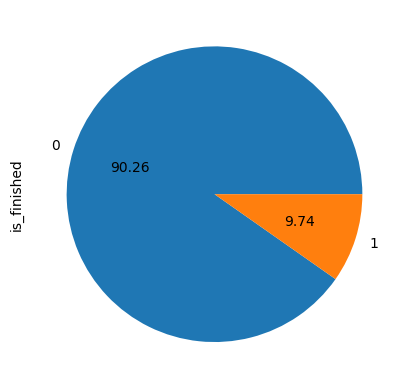

In [8]:
# Répartition de la colonne target
data[label_target].value_counts().plot.pie(autopct='%.2f')

## Sélection

In [9]:
# Données utiles au problèmes : [2,5,6,7,9,16,17,23,24]
# Données target : [11]
# Données à enlever : [0,1,3,4,8,10,12,13,14,15,18,19,20,21,22,25]

In [10]:
# Sélection des colonnes utiles au problème
data_selection = data.loc[:,
                          ['is_pro',
                           'acquisition_id',
                           'work_type_id',
                           'volume',
                           'handling',
                           'is_finished',
                           'plant_id',
                           'previous_bill_count',
                           'client_maturity']
                          ]
labels_selection = data_selection.columns

In [11]:
#Affichage des données
data_selection

,is_pro,acquisition_id,work_type_id,volume,handling,is_finished,plant_id,previous_bill_count,client_maturity
0,0,f91db25c-53b0-4993-94e4-8704b4981c77,e00cd633-2fac-4733-ad1d-50e0a2ac0e78,2.5,1,0,ed4ec1c3-683b-455e-a085-c4e45f2f0ada,0,90D
1,0,f91db25c-53b0-4993-94e4-8704b4981c77,de6dba1f-936e-47aa-9f93-03f5ee76f3b1,15.0,1,0,5e101746-6975-446c-93c2-b363e9421ce4,0,30D
2,0,f6851d59-f035-4199-9b9e-aba4d33d6995,de6dba1f-936e-47aa-9f93-03f5ee76f3b1,6.0,0,1,a13601cc-8c4b-4f31-9f9b-45913b7fe4d9,0,30D
3,0,f91db25c-53b0-4993-94e4-8704b4981c77,e00cd633-2fac-4733-ad1d-50e0a2ac0e78,4.5,0,0,ed4ec1c3-683b-455e-a085-c4e45f2f0ada,0,15D
4,0,f91db25c-53b0-4993-94e4-8704b4981c77,b3716372-9e82-4a07-802f-6bb67ef57e23,7.5,0,1,c15debea-1674-4f7f-9ffa-7a3510434e02,0,48H
...,...,...,...,...,...,...,...,...,...
55112,0,f91db25c-53b0-4993-94e4-8704b4981c77,b3716372-9e82-4a07-802f-6bb67ef57e23,6.0,1,0,9f112b10-6c24-4aca-9c01-dfaa59664b48,0,48H
55113,0,f91db25c-53b0-4993-94e4-8704b4981c77,bfaa865c-602d-49b5-8754-a48c67649b5c,6.0,0,0,f02f4e0f-f963-4ea6-9dfb-7cec98d8bbe2,0,30D
55114,0,f91db25c-53b0-4993-94e4-8704b4981c77,b3716372-9e82-4a07-802f-6bb67ef57e23,5.0,0,0,57f96607-5fd7-436f-97bf-39dda209fe00,0,90D
55115,0,f91db25c-53b0-4993-94e4-8704b4981c77,e00cd633-2fac-4733-ad1d-50e0a2ac0e78,6.5,0,0,777f596a-fe66-4593-8ac5-65c45b1f9eda,0,30D


In [12]:
labels_selection

Index(['is_pro', 'acquisition_id', 'work_type_id', 'volume', 'handling',
       'is_finished', 'plant_id', 'previous_bill_count', 'client_maturity'],
      dtype='object')

In [13]:
data_selection.dtypes

is_pro                   int64
acquisition_id          object
work_type_id            object
volume                 float64
handling                 int64
is_finished              int64
plant_id                object
previous_bill_count      int64
client_maturity         object
dtype: object

In [14]:
#Taille des données
nb_devis = data_selection.shape[0]
nb_colonnes = data_selection.shape[1]
print("Nombre de lignes :", nb_devis)
print("Nombre de variables :", nb_colonnes)

Nombre de lignes : 55117
Nombre de variables : 9


## Pré-Traitement

In [15]:
#Récupération des indices des lignes supprimées selon volume
rows_remove = data_selection[data_selection['volume'] > 50].index

In [16]:
rows_remove

Int64Index([12454, 13702, 13703, 15071, 15444, 17682, 19051, 19277, 20724,
            25057, 25376, 27176, 27577, 27818, 27905, 29953, 36620, 40118,
            41274, 48377],
           dtype='int64')

In [17]:
#Enlever les valeurs aberrantes (volume > 50)
data_selection = data_selection[data_selection['volume'] <= 50]

<Axes: >

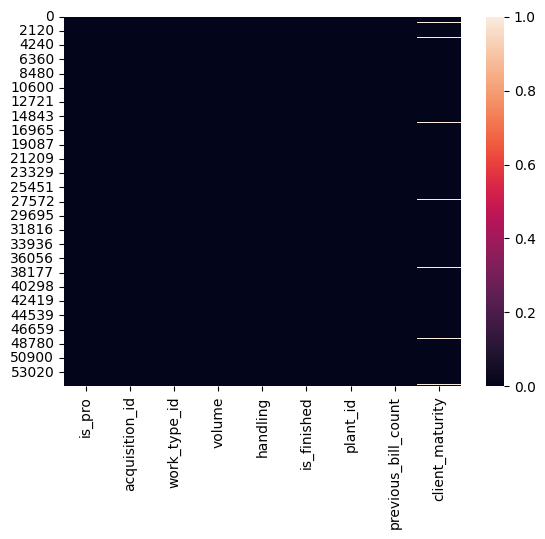

In [18]:
#Identifie les valeurs manquantes
import seaborn
seaborn.heatmap(data_selection.isna())

In [19]:
#Récupération des indices des lignes supprimées selon nan
nanRows = data_selection[data_selection.isna().any(axis=1)].index

In [20]:
nanRows

Int64Index([    6,    43,    89,   103,   123,   129,   137,   138,   143,
              190,
            ...
            54706, 54751, 54851, 54859, 54877, 54888, 54986, 55069, 55095,
            55110],
           dtype='int64', length=1770)

In [21]:
# Récupération de toutes les lignes supprimées
all_rows_remove = pd.Index.union(rows_remove, nanRows)

In [22]:
#Suppression des lignes contenant un nan
data_selection = data_selection.dropna()

In [23]:
#Taille des données
nb_devis = data_selection.shape[0]
nb_colonnes = data_selection.shape[1]
print("Nombre de lignes :", nb_devis)
print("Nombre de variables :", nb_colonnes)

Nombre de lignes : 53327
Nombre de variables : 9


In [24]:
#Transformation en array
data_selection_array = data_selection.to_numpy()

In [25]:
#Séparation des données
data_caracteres = np.delete(data_selection_array,5,1)
data_target = data_selection_array[:,5]

In [26]:
#Donnees categorielles : [1,2,5,7]
data_caracteres_cat = data_caracteres[:, [1,2,5,7]]

#Donnees numeriques : [0,3,4,6]
data_caracteres_num = data_caracteres[:, [0,3,4,6]]

In [27]:
#Traitement des données categorielles
from sklearn.preprocessing import OneHotEncoder

In [28]:
#Traitement des données categorielles (colonne 1 : acquisition_id)
from sklearn.preprocessing import OneHotEncoder
data_cat_encode_acquisitionid = OneHotEncoder().fit_transform(data_caracteres_cat[:,0].reshape(-1,1)).toarray()
print("Shape : ", data_cat_encode_acquisitionid.shape)
print("acquisition_id a été encodé sur", data_cat_encode_acquisitionid.shape[1], "colonnes ")

Shape :  (53327, 26)
acquisition_id a été encodé sur 26 colonnes 


In [29]:
#Traitement des données categorielles (colonne 2 : work_type_id)
from sklearn.preprocessing import OneHotEncoder
data_cat_encode_worktypeid = OneHotEncoder().fit_transform(data_caracteres_cat[:,1].reshape(-1,1)).toarray()
print("Shape : ", data_cat_encode_worktypeid.shape)
print("work_type_id a été encodé sur", data_cat_encode_worktypeid.shape[1], "colonnes ")

Shape :  (53327, 28)
work_type_id a été encodé sur 28 colonnes 


In [30]:
#Traitement des données categorielles (colonne 3 : plant_id)
from sklearn.preprocessing import OneHotEncoder
data_cat_encode_plantid = OneHotEncoder().fit_transform(data_caracteres_cat[:,2].reshape(-1,1)).toarray()
print("Shape : ", data_cat_encode_plantid.shape)
print("plant_id a été encodé sur", data_cat_encode_plantid.shape[1], "colonnes ")

Shape :  (53327, 412)
plant_id a été encodé sur 412 colonnes 


In [31]:
#Traitement des données categorielles (colonne 4 : client_maturity)
from sklearn.preprocessing import OneHotEncoder
data_cat_encode_clientmaturity = OneHotEncoder().fit_transform(data_caracteres_cat[:,3].reshape(-1,1)).toarray()
print("Shape : ", data_cat_encode_clientmaturity.shape)
print("client_maturity a été encodé sur", data_cat_encode_clientmaturity.shape[1], "colonnes ")

Shape :  (53327, 6)
client_maturity a été encodé sur 6 colonnes 


In [32]:
#Concaténation des données catégorielles encodées
data_caracteres_cat_encode = np.concatenate(
    (data_cat_encode_acquisitionid,
     data_cat_encode_worktypeid,
     data_cat_encode_plantid,
     data_cat_encode_clientmaturity),
     axis=1)

In [33]:
# Traitement des donnees numeriques

#Standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_caracteres_num_scaled = scaler.fit_transform(data_caracteres_num)

In [34]:
#Concaténation des donnees categorielles et numeriques
X = np.concatenate((data_caracteres_cat_encode, data_caracteres_num_scaled),axis=1)

In [35]:
#Taille des données
nb_devis = X.shape[0]
nb_colonnes = X.shape[1]
print("Nombre de lignes :", nb_devis)
print("Nombre de variables :", nb_colonnes)

Nombre de lignes : 53327
Nombre de variables : 476


In [36]:
X = X.astype(float)

Organisation des données :    

*   variables [0,25] -> acquisition_id
*   variables [26,53] -> work_type_id
*   variables [54,465] -> plant_id
*   variables [466,471] -> client_maturity
*   variables [472] -> is_pro
*   variables [473] -> volume
*   variables [474] -> handling
*   variables [475] -> previous_bill_count



---
* acquisition_id -> source d'arrivé du client sur le site beton direct
* work_type_id -> type d'ouvrage
* plant_id -> id de la centrale choisie
* client_maturity -> dans combien de temps le client veut la livraison
* is_pro -> si le client est un professionnel ou pas
* volume -> volume de béton commandé
* handling -> manutention, si le client veut juste les produits ou la pose inclus
* previous_bill_count -> si c'est un ancien client, combien de fois il a déjà commandé

## Détermination du nombre de clusters

### Détermination du nombre de clusters (méthode du coude)



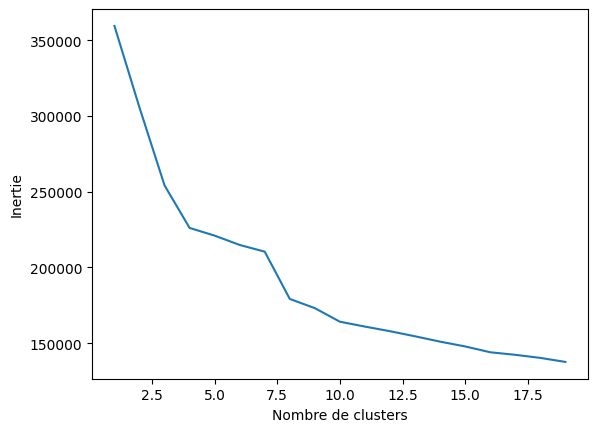

In [ ]:
from sklearn.cluster import KMeans

# Calcul de l'inertie intra-clusters pour chaque nb de clusters
tab_inertias = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    tab_inertias.append(kmeans.inertia_)
    
# Tracer la courbe d'inertie
import matplotlib.pyplot as plt
plt.plot(range(1, 20), tab_inertias)
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

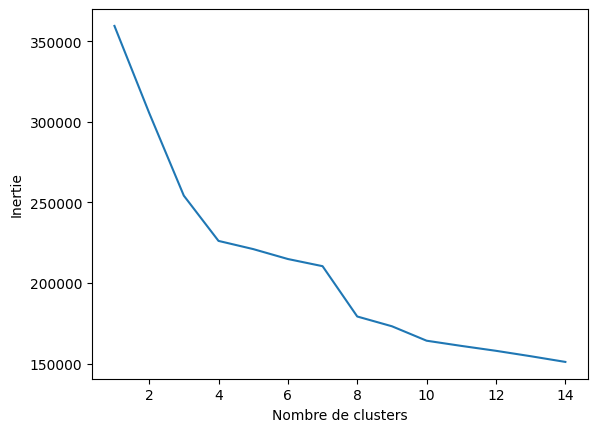

In [ ]:
# Tracer la courbe d'inertie
import matplotlib.pyplot as plt
plt.plot(range(1, 15), tab_inertias[0:14])
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

In [ ]:
# Conclusion : la méthode du coude nous indique 8 clusters

### Détermination du nombre de clusters (silhouette score)

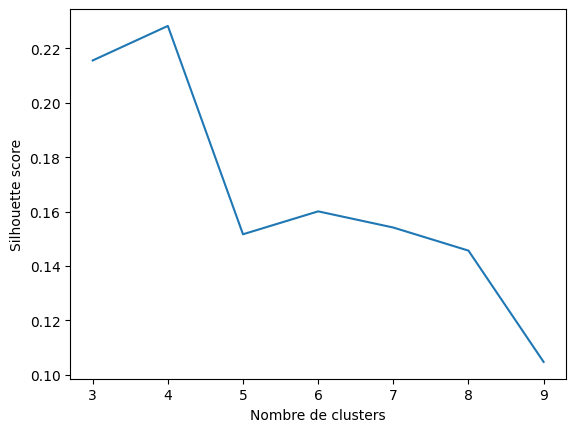

In [ ]:
#Evaluation du clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(3, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_pred = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, kmeans_pred))

# Tracer la courbe de silhouette score
plt.plot(range(3, 10), silhouette_scores)
plt.xlabel('Nombre de clusters')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
print("Score pour 4 clusters :", silhouette_scores[1])

Score pour 4 clusters : 0.2282272712946609


In [ ]:
# Conclusion : le silhouette_score est le plus élevé pour 4 clusters

### Inertie inter-clusters

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(X)

inter_cluster_inertia = sum(np.linalg.norm(kmeans.cluster_centers_ - kmeans.cluster_centers_.mean(axis=0))**2 for i in range(kmeans.n_clusters))
print("Inertie inter-cluster pour 4 clusters :", inter_cluster_inertia)

Inertie inter-cluster pour 4 clusters : 101.93062709581065


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=42, n_init='auto')
kmeans.fit(X)

inter_cluster_inertia = sum(np.linalg.norm(kmeans.cluster_centers_ - kmeans.cluster_centers_.mean(axis=0))**2 for i in range(kmeans.n_clusters))
print("Inertie inter-cluster pour 8 clusters :", inter_cluster_inertia)

Inertie inter-cluster pour 8 clusters : 9236.078812865411


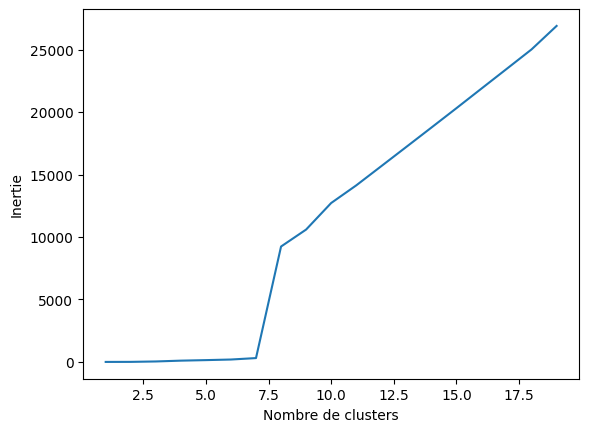

In [ ]:
from sklearn.cluster import KMeans

# Calcul de l'inertie pour chaque nb de clusters
tab_inertias_inter = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    inter_cluster_inertia = sum(np.linalg.norm(kmeans.cluster_centers_ - kmeans.cluster_centers_.mean(axis=0))**2 for i in range(kmeans.n_clusters))
    tab_inertias_inter.append(inter_cluster_inertia)
    
# Tracer la courbe d'inertie
import matplotlib.pyplot as plt
plt.plot(range(1, 20), tab_inertias_inter)
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

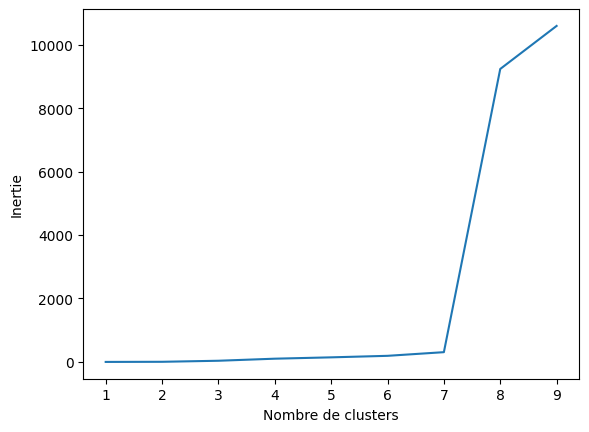

In [ ]:
# Tracer la courbe d'inertie
import matplotlib.pyplot as plt
plt.plot(range(1, 10), tab_inertias_inter[0:9])
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

## Traitement

### K-means

#### Essai avec 4 clusters

##### Visualisation graphique (4 clusters)

In [ ]:
#Taille des données standardisées
nb_devis_X = X.shape[0]
nb_colonnes_X = X.shape[1]
print("Nombre de lignes :", nb_devis_X)
print("Nombre de variables :", nb_colonnes_X)

Nombre de lignes : 53327
Nombre de variables : 476


In [ ]:
#Application du PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
#Taille des données pca
nb_devis_X_pca = X_pca.shape[0]
nb_colonnes_X_pca = X_pca.shape[1]
print("Nombre de lignes :", nb_devis_X_pca)
print("Nombre de variables :", nb_colonnes_X_pca)

Nombre de lignes : 53327
Nombre de variables : 2


In [ ]:
#Application de KMeans
from sklearn.cluster import KMeans
kmeans_pca = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans_pca.fit(X_pca)
kmeans_pca_pred = kmeans_pca.predict(X_pca)

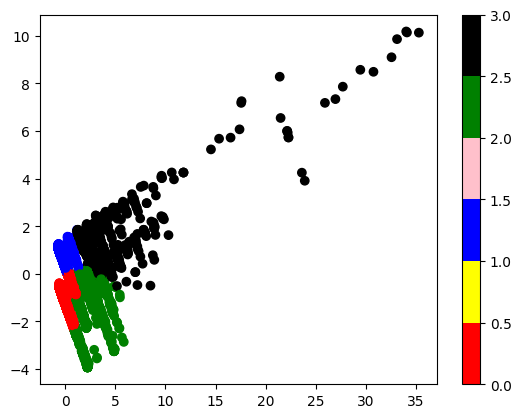

In [ ]:
import matplotlib
colors = ['red','yellow','blue','pink','green', 'black']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pca_pred, cmap=matplotlib.colors.ListedColormap(colors))
plt.colorbar()

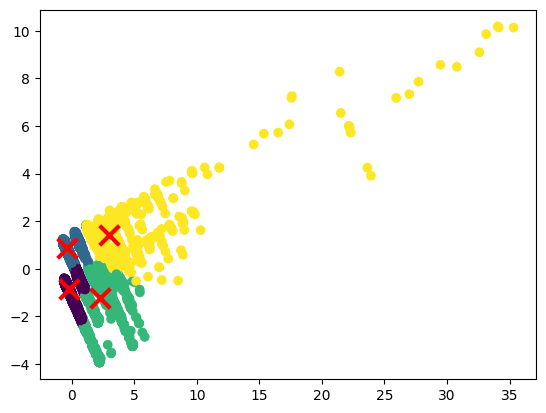

In [ ]:
#Affichage des centroides des clusters

# Obtenir les prédictions de cluster
labels = kmeans_pca.labels_

# Obtenir les coordonnées des centres de chaque cluster
centers = kmeans_pca.cluster_centers_

# Tracer les points et les centres des clusters sur un graphique
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()

In [ ]:
centers

array([[-0.19555745, -0.8613799 ],
       [-0.39033725,  0.8707038 ],
       [ 2.26908311, -1.22537483],
       [ 2.96493131,  1.42506217]])

In [ ]:
# Cluster 0 : en bas à gauche (violet)
# Cluster 1 : en haut à gauche (bleu)
# Cluster 2 : en bas à droite (vert)
# Cluster 3 : en haut à droite (jaune)

In [ ]:
print(pca.components_)

In [ ]:
#Analyse composante 1
# Affichage des 10 variables ayant les coefficients les plus élevés pour la première composante principale
ind_vars_importance_1 = np.argsort(np.abs(pca.components_[0]))[::-1]
top_variables_1 = ind_vars_importance_1[:10]
top_coefficients_1 = pca.components_[0, top_variables_1]

for variable, coefficient in zip(top_variables_1, top_coefficients_1):
    print("Variable", variable, " :", np.abs(coefficient))

Variable 472  : 0.6820191781392684
Variable 475  : 0.6046406378839175
Variable 473  : 0.4021146639532665
Variable 474  : 0.0546007587256076
Variable 46  : 0.028247263500278442
Variable 468  : 0.027487509660812627
Variable 24  : 0.026272115960251537
Variable 40  : 0.023188382900210986
Variable 26  : 0.019827607712908108
Variable 467  : 0.019607103880775564


In [ ]:
#Analyse composante 2
# Affichage des 10 variables ayant les coefficients les plus élevés pour la première composante principale
ind_vars_importance_2 = np.argsort(np.abs(pca.components_[1]))[::-1]
top_variables_2 = ind_vars_importance_2[:10]
top_coefficients_2 = pca.components_[1, top_variables_2]

for variable, coefficient in zip(top_variables_2, top_coefficients_2):
    print("Variable", variable, " :", np.abs(coefficient))

Variable 474  : 0.8289150778090355
Variable 473  : 0.4798364479433185
Variable 475  : 0.21178299357584313
Variable 472  : 0.15802385637487162
Variable 40  : 0.07163115339557913
Variable 468  : 0.03658862042609149
Variable 466  : 0.0353644749147456
Variable 469  : 0.030292774569681817
Variable 46  : 0.030279253446255507
Variable 34  : 0.028767901602888654


##### Analyse (4 clusters)

In [61]:
#Application de KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(X)
kmeans_pred = kmeans.predict(X)

In [62]:
#Données qui contiennent la prediction dans quel cluster se trouve chaque ligne
pred_clusters_4 = kmeans.labels_

#Nombre de features
nb_features = X.shape[1]
#Nombre de clusters
nb_clusters = kmeans.n_clusters

In [ ]:
for i in range(nb_clusters):
    most_important_features = np.argsort(np.abs(kmeans.cluster_centers_[i]))[::-1][:9]
    feature_influence = np.abs(kmeans.cluster_centers_[i][most_important_features])
    feature_influence_percentage = (feature_influence / np.sum(feature_influence)) * 100

    print("Cluster", i, " :")
    print("Caractéristiques les plus importantes par indice :", most_important_features)
    print("Pourcentage d'influence de chaque caractéristique :", feature_influence_percentage)

Cluster 0  :
Caractéristiques les plus importantes par indice : [474  24  40 466 472 467 469 473 468]
Pourcentage d'influence de chaque caractéristique : [28.55859171 26.09806394 10.10247637  8.87663292  7.68689146  6.99851674
  4.93437762  3.39603639  3.34841285]
Cluster 1  :
Caractéristiques les plus importantes par indice : [474  24 466 472  40 467 473 468 469]
Pourcentage d'influence de chaque caractéristique : [27.30851373 26.8303554   9.77513292  7.92354589  6.62580303  6.32745759
  6.14248495  4.69634892  4.37035756]
Cluster 2  :
Caractéristiques les plus importantes par indice : [472  24 475 466 468  40 467  45 473]
Pourcentage d'influence de chaque caractéristique : [56.41001564 13.67593187  9.25626089  5.57967852  4.40612427  3.27917326
  2.69451446  2.5292848   2.16901629]
Cluster 3  :
Caractéristiques les plus importantes par indice : [473  24 469 467  40 466  34 471  45]
Pourcentage d'influence de chaque caractéristique : [63.46225468 15.08681987  3.71584318  3.34343128  3

In [63]:
# Transformation des predictions en dataframe Pandas
col_pred_4 = pd.DataFrame(pred_clusters_4, columns=['prediction'])

In [64]:
# Concaténation des données brutes et des predictions
data_pred_4 = pd.concat([data_selection.reset_index(drop=True), col_pred_4], axis=1)

In [ ]:
# Affichage des données
data_pred_4

,is_pro,acquisition_id,work_type_id,volume,handling,is_finished,plant_id,previous_bill_count,client_maturity,prediction
0,0,f91db25c-53b0-4993-94e4-8704b4981c77,e00cd633-2fac-4733-ad1d-50e0a2ac0e78,2.5,1,0,ed4ec1c3-683b-455e-a085-c4e45f2f0ada,0,90D,0
1,0,f91db25c-53b0-4993-94e4-8704b4981c77,de6dba1f-936e-47aa-9f93-03f5ee76f3b1,15.0,1,0,5e101746-6975-446c-93c2-b363e9421ce4,0,30D,0
2,0,f6851d59-f035-4199-9b9e-aba4d33d6995,de6dba1f-936e-47aa-9f93-03f5ee76f3b1,6.0,0,1,a13601cc-8c4b-4f31-9f9b-45913b7fe4d9,0,30D,1
3,0,f91db25c-53b0-4993-94e4-8704b4981c77,e00cd633-2fac-4733-ad1d-50e0a2ac0e78,4.5,0,0,ed4ec1c3-683b-455e-a085-c4e45f2f0ada,0,15D,1
4,0,f91db25c-53b0-4993-94e4-8704b4981c77,b3716372-9e82-4a07-802f-6bb67ef57e23,7.5,0,1,c15debea-1674-4f7f-9ffa-7a3510434e02,0,48H,1
...,...,...,...,...,...,...,...,...,...,...
53322,0,f91db25c-53b0-4993-94e4-8704b4981c77,b3716372-9e82-4a07-802f-6bb67ef57e23,6.0,1,0,9f112b10-6c24-4aca-9c01-dfaa59664b48,0,48H,0
53323,0,f91db25c-53b0-4993-94e4-8704b4981c77,bfaa865c-602d-49b5-8754-a48c67649b5c,6.0,0,0,f02f4e0f-f963-4ea6-9dfb-7cec98d8bbe2,0,30D,1
53324,0,f91db25c-53b0-4993-94e4-8704b4981c77,b3716372-9e82-4a07-802f-6bb67ef57e23,5.0,0,0,57f96607-5fd7-436f-97bf-39dda209fe00,0,90D,1
53325,0,f91db25c-53b0-4993-94e4-8704b4981c77,e00cd633-2fac-4733-ad1d-50e0a2ac0e78,6.5,0,0,777f596a-fe66-4593-8ac5-65c45b1f9eda,0,30D,1


In [ ]:
# Répartition de la colonne prediction
data_pred_4['prediction'].value_counts()

1    24614
0    23067
2     3722
3     1924
Name: prediction, dtype: int64

In [ ]:
data_pred_4.groupby('prediction')['is_pro'].value_counts()

prediction  is_pro
0           0         23067
1           0         24614
2           1          3721
            0             1
3           0          1782
            1           142
Name: is_pro, dtype: int64

*   Cluster 0 : pas de professionnel
*   Cluster 1 : pas de professionnel
*   Cluster 2 : la pluspart des professionnel sont ici
*   Cluster 3 : quelques uns





In [65]:
data_pred_4.groupby('prediction')['acquisition_id'].value_counts()

prediction  acquisition_id                      
0           f91db25c-53b0-4993-94e4-8704b4981c77    21886
            eb1fe89c-aeb1-455a-8714-0457171f40e3      484
            fb378985-6eac-42dc-88ff-049b8af67f2a      154
            ce62a7a8-751d-4f63-ba79-b9b1e600b160      150
            a4467a36-88f3-467c-bf51-0f95d95e6323       97
            f6851d59-f035-4199-9b9e-aba4d33d6995       87
            00064b8f-72bb-4f38-b020-95d265a0f0a6       40
            49556876-ab90-4aad-9e21-66a10e0ff806       39
            7f1ee7ac-18bf-4335-8cde-c7112a6189ca       28
            141432bc-65f7-423b-a920-95ee03367f35       24
            4f74cff5-d017-42e9-b668-96e0d658e265       23
            1e698fc9-ce05-45b0-b413-a6c46a077432       14
            3731307b-2580-4fb4-b1e1-9ef8e49e04e2       11
            58f4e9c3-7312-4351-b568-88beabbccd0a        9
            e04f8933-79dd-4e46-967a-af404c4a3a4c        7
            42bb99c4-47b8-4a26-bc5f-5e91ced93be8        3
            a4933271-18

In [66]:
data_pred_4.groupby('prediction')['work_type_id'].value_counts()

prediction  work_type_id                        
0           b3716372-9e82-4a07-802f-6bb67ef57e23    8472
            e00cd633-2fac-4733-ad1d-50e0a2ac0e78    2681
            de6dba1f-936e-47aa-9f93-03f5ee76f3b1    2504
            cb13f370-2b24-4726-9732-5aef675ab662    2447
            0bb58cb7-4748-47c6-a829-a73cd7f948ff    1477
            84d5a61a-e007-44cd-ba65-893806497ff2    1383
            af169ec8-b0c9-4d72-aea4-be26ca4bf062    1074
            d4f93f1a-8390-4f10-8bf6-64321ab4d867     492
            7d2a6bb4-28d6-4329-b735-4ee4e526b70f     407
            543974f6-1ae3-4985-9afa-a56b10443422     397
            86ba66b4-db81-42e4-bd73-cf2dc2867e20     373
            4e0cf787-dc9c-40c9-a962-c5cb084a2f65     340
            a7e36d1d-3b85-45c3-af3f-0118dbfc0919     248
            bfaa865c-602d-49b5-8754-a48c67649b5c     183
            e5968b69-0378-40f8-aecb-07ddca03bdfc     171
            9c00b7b8-4cdb-42f5-9570-1d90e423842e     118
            f60aa7e9-895d-4b33-b976-b69

*   Cluster 0 : la plupart des type de travaux work_type_id sont ici
*   Cluster 1 : pas de work_type_id
*   Cluster 2 : pas de work_type_id
*   Cluster 3 : quelques uns


In [67]:
data_pred_4.groupby('prediction')['volume'].value_counts()

prediction  volume
0           5.00      2171
            6.00      2008
            4.00      1969
            3.00      1905
            7.00      1362
            2.00      1272
            8.00      1123
            10.00      852
            1.00       768
            2.50       759
            3.50       714
            4.50       695
            7.50       680
            9.00       652
            5.50       528
            12.00      518
            1.50       513
            15.00      437
            6.50       411
            11.00      337
            13.00      272
            20.00      235
            14.00      232
            16.00      172
            1.25       155
            18.00      141
            8.50       138
            2.25       116
            3.75       108
            1.75       102
            2.75        95
            17.00       95
            3.25        92
            9.50        72
            4.25        71
            5.25        62
         

*   Cluster 3 : les gros volumes sont ici


In [ ]:
data_pred_4.groupby('prediction')['handling'].value_counts()

prediction  handling
0           1           23067
1           0           24614
2           0            2015
            1            1707
3           0            1035
            1             889
Name: handling, dtype: int64

*   Cluster 0 : ici ils demandent tous la manutention
*   Cluster 1 : ici ils ne demandent pas du tout la manutention
*   Cluster 2 : moitié-moitié
*   Cluster 3 : moitié-moitié


In [68]:
data_pred_4.groupby('prediction')['plant_id'].value_counts()

prediction  plant_id                            
0           6a00cff3-a509-4b14-a201-7cb76d99f5ee    1006
            b6700b02-ba65-46df-8b82-1cd46009285f     500
            4808fc42-3c69-4bc5-a44f-52ec177eedb1     475
            3aefea71-3086-4c2e-a13c-23f88b7b6a4c     453
            610d2b0c-cdaf-4f02-bc54-6542e1e37771     434
            ee5ccc09-7f18-4dd8-9527-eca26de1f657     342
            d321b4c7-cca3-4f71-93a2-f6e529a1ecf9     317
            3cda3156-59e2-42e7-9d06-09bfd8f5690c     313
            15381aee-5358-4cd8-82e4-e1355254ee1e     305
            e8966f1c-a373-47a1-911b-9a0e045b14b4     288
            d885a818-d759-4880-8f43-ee5992c9c62c     281
            85c8e6d9-460c-4300-aa57-29972eba9ca3     280
            ed4ec1c3-683b-455e-a085-c4e45f2f0ada     270
            8b2176e0-b459-4b0b-8732-0e65aa84c917     236
            a0a9cf6e-88f5-477b-8c88-8e9efdb6aa6f     220
            b9f48a71-5afe-4779-908f-bb1314491f7b     220
            0783597d-b5cf-49e5-843a-f57

In [ ]:
data_pred_4.groupby('prediction')['previous_bill_count'].value_counts()

prediction  previous_bill_count
0           0                      22224
            1                        639
            2                        158
            3                         30
            4                          7
            6                          5
            5                          2
            7                          1
            8                          1
1           0                      23696
            1                        697
            2                        159
            3                         37
            4                         11
            5                          8
            6                          6
2           0                       3172
            1                        288
            2                         98
            3                         48
            4                         29
            5                         24
            7                         12
            6            

*   Cluster 0 : -
*   Cluster 1 : -
*   Cluster 2 : les clients qui achètent le plus fréquemment sont ici
*   Cluster 3 : -


In [ ]:
data_pred_4.groupby('prediction')['client_maturity'].value_counts()

prediction  client_maturity
0           15D                7444
            30D                5869
            90D                4138
            48H                2808
            NC                 1926
            >90D                882
1           15D                8486
            30D                5493
            48H                4077
            90D                3794
            NC                 2073
            >90D                691
2           15D                1317
            48H                1040
            30D                 636
            90D                 387
            NC                  235
            >90D                107
3           90D                 449
            30D                 404
            15D                 376
            NC                  318
            48H                 224
            >90D                153
Name: client_maturity, dtype: int64

*   Cluster 2 : travaux à court terme
*   Cluster 3 : travaux à long terme



In [ ]:
data_pred_4.groupby('prediction')['is_finished'].value_counts()

prediction  is_finished
0           0              21245
            1               1822
1           0              22064
            1               2550
2           0               3113
            1                609
3           0               1900
            1                 24
Name: is_finished, dtype: int64

*   Cluster 0 : 7.90 % finalisent leur devis
*   Cluster 1 : 10.36 % finalisent leur devis
*   Cluster 2 : 16.36 % finalisent leur devis
*   Cluster 3 : 1.25 % finalisent leur devis



##### Conclusion (4 clusters)

Cluster 0 :     
*   Clients non professionnels
*   Demande tout type de travaux
*   Petits volumes de béton
*   Ne font pas les travaux eux-mêmes, demandent toujours la manutention
*   Beaucoup de nouveaux clients ou acheteurs rares dans l'enseigne
*   Pour des travaux à des dates diverses


Cluster 1 :    
*   Clients non professionnels
*   Ne demandent pas du tout la manutention, préfèrent faire eux-mêmes les travaux
*   Beaucoup de nouveaux clients ou acheteurs rares dans l'enseigne
*   Pour des travaux à des dates diverses


Cluster 2 :    
*   Clients professionnels
*   Manutention moitié-moitié
*   Clients récurrents, qui achètent de nombreuses fois ici
*   Plutôt des clients qui font des travaux vite, planifié pour le lendemain ou week-end, achètent et font les travaux directement


Cluster 3 :    
*   Quelques uns sont des professionnels mais la pluspart non
*   Achètent de très gros volume de béton
*   Manutention moitié-moitié
*   Majorité de nouveaux clients
*   Pour des travaux de long termes












Hypothèses :    


*   Le cluster 0 regroupe le grand public, non professionnel, qui fait des petits travaux très divers à leur domicile. Ils découvrent Béton Direct un peu par hasard sur internet. Ils préfèrent demander à ce que les travaux soient faits par des professionnels, ils ne veulent pas les faire eux-mêmes.
*   Le cluster 1 regroupe la partie du grand public qui préfèrent faire les travaux eux-mêmes.
*   Le cluster 2 représente les professionnels qui connaissent bien Béton Direct, ce sont des acheteurs réguliers. Beaucoup achètent pour faire les travaux dans les 48H suivant l'achat.
*   Le cluster 3 regroupe des personnes achetant de très gros volumes de béton


*   Cluster 0 : 7.90 % finalisent leur devis
*   Cluster 1 : 10.36 % finalisent leur devis
*   Cluster 2 : 16.36 % finalisent leur devis
*   Cluster 3 : 1.25 % finalisent leur devis

#### Essai avec 8 clusters

##### Visualisation graphique (8 clusters)

In [37]:
#Taille des données
nb_devis_X = X.shape[0]
nb_colonnes_X = X.shape[1]
print("Nombre de lignes :", nb_devis_X)
print("Nombre de variables :", nb_colonnes_X)

Nombre de lignes : 53327
Nombre de variables : 476


In [38]:
#Application du PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [39]:
#Application de KMeans
kmeans_pca = KMeans(n_clusters=8, random_state=42, n_init='auto')
kmeans_pca.fit(X_pca)
kmeans_pca_pred = kmeans_pca.predict(X_pca)

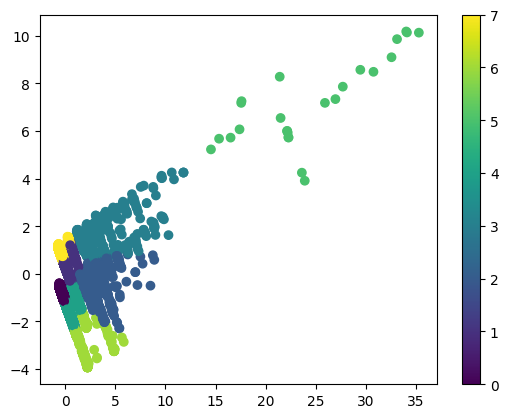

In [40]:
import matplotlib
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pca_pred)
plt.colorbar()

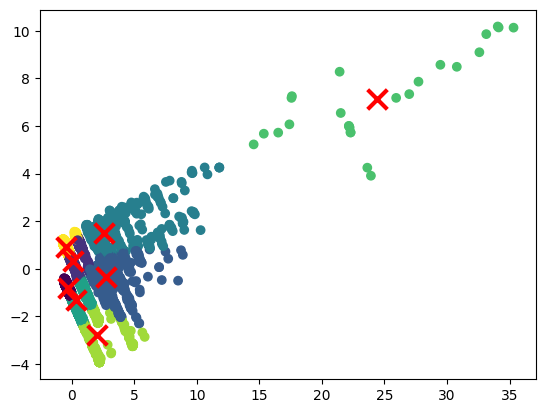

In [41]:
#Affichage des centroides des clusters

# Obtenir les prédictions de cluster
labels = kmeans_pca.labels_

# Obtenir les coordonnées des centres de chaque cluster
centers = kmeans_pca.cluster_centers_

# Tracer les points et les centres des clusters sur un graphique
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()

In [42]:
centers

array([[-0.33986975, -0.7881884 ],
       [ 0.13825115,  0.3250171 ],
       [ 2.75526279, -0.33487709],
       [ 2.61128604,  1.51666295],
       [ 0.35339126, -1.31100193],
       [24.4267583 ,  7.13657977],
       [ 1.9795953 , -2.79634694],
       [-0.45792501,  0.93320698]])

In [ ]:
# Cluster 0 : en noir
# Cluster 1 : en violet 
# Cluster 2 : en bleu foncé
# Cluster 3 : en bleu-vert
# Cluster 4 : en bleu-vert (sous le noir)
# Cluster 5 : en vert (en heut à droite)
# Cluster 6 : en vert (tout en bas)
# Cluster 7 : en jaune

##### Analyse (8 clusters)

In [43]:
#Application de KMeans
kmeans = KMeans(n_clusters=8, random_state=42, n_init='auto')
kmeans.fit(X)
kmeans_pred = kmeans.predict(X)

In [45]:
#Nombre de features
nb_features = X.shape[1]
#Nombre de clusters
nb_clusters = kmeans.n_clusters

In [46]:
for i in range(nb_clusters):
    most_important_features = np.argsort(np.abs(kmeans.cluster_centers_[i]))[::-1][:9]
    feature_influence = np.abs(kmeans.cluster_centers_[i][most_important_features])
    feature_influence_percentage = (feature_influence / np.sum(feature_influence)) * 100

    print("Cluster", i, " :")
    print("Caractéristiques les plus importantes par indice :", most_important_features)
    print("Pourcentage d'influence de chaque caractéristique :", feature_influence_percentage)

Cluster 0  :
Caractéristiques les plus importantes par indice : [474  24  40 466 472 467 473 469  46]
Pourcentage d'influence de chaque caractéristique : [27.66940366 25.3037586   9.98738152  8.69689106  7.44755571  6.85704514
  6.08097094  4.7115893   3.24540408]
Cluster 1  :
Caractéristiques les plus importantes par indice : [ 40 474  24 466 472 467 473 469 468]
Pourcentage d'influence de chaque caractéristique : [23.31960647 22.46039766 21.91327506  7.98977171  6.51686845  5.59654107
  5.00328724  3.88591573  3.31433659]
Cluster 2  :
Caractéristiques les plus importantes par indice : [472  24 466 475 468  40 467  45 473]
Pourcentage d'influence de chaque caractéristique : [58.71204415 14.21074399  5.80057539  5.69943821  4.55791195  3.41732444
  2.81374506  2.63178363  2.15643318]
Cluster 3  :
Caractéristiques les plus importantes par indice : [473  24 474 472 466 469  40 467  34]
Pourcentage d'influence de chaque caractéristique : [40.99589001 21.01472421  7.64183557  6.24902561  5

Principaux critères d'influence 

Cluster 0 : 
*   Handling : 27.7 %
*   Acquisition_id : 25.3 %

Cluster 1 :
*   Work_type_id : 23.32 %
*   Handling : 22.46 %
*   Acquisition_id : 21.91 %

Cluster 2 : 
*   is_pro : 58.71 %
*   Acquisition_id : 14.21 %

Cluster 3 : 
*   Volume : 41 %
*   Acquisition_id : 21.01 %

Cluster 4 : 
*   client_maturity : 24.1 %
*   Handling : 23.21 %
*   Acquisition_id : 22.56 %

Cluster 5 : 
*   previous_bill_count : 81.87 %

Cluster 6 : 
*   Handling : 26.36 %
*   Acquisition_id : 26.14 %

Cluster 7 : 
*   Volume : 68.52 %
*   Acquisition_id : 12.52 %




In [50]:
#Données qui contiennent la prediction dans quel cluster se trouve chaque ligne
pred_clusters_8 = kmeans.labels_

In [51]:
# Transformation des predictions en dataframe Pandas
col_pred_8 = pd.DataFrame(pred_clusters_8, columns=['prediction'])

In [52]:
# Concaténation des données brutes et des predictions
data_pred_8 = pd.concat([data_selection.reset_index(drop=True), col_pred_8], axis=1)

In [76]:
data_pred_8

,is_pro,acquisition_id,work_type_id,volume,handling,is_finished,plant_id,previous_bill_count,client_maturity,prediction
0,0,f91db25c-53b0-4993-94e4-8704b4981c77,e00cd633-2fac-4733-ad1d-50e0a2ac0e78,2.5,1,0,ed4ec1c3-683b-455e-a085-c4e45f2f0ada,0,90D,0
1,0,f91db25c-53b0-4993-94e4-8704b4981c77,de6dba1f-936e-47aa-9f93-03f5ee76f3b1,15.0,1,0,5e101746-6975-446c-93c2-b363e9421ce4,0,30D,3
2,0,f6851d59-f035-4199-9b9e-aba4d33d6995,de6dba1f-936e-47aa-9f93-03f5ee76f3b1,6.0,0,1,a13601cc-8c4b-4f31-9f9b-45913b7fe4d9,0,30D,6
3,0,f91db25c-53b0-4993-94e4-8704b4981c77,e00cd633-2fac-4733-ad1d-50e0a2ac0e78,4.5,0,0,ed4ec1c3-683b-455e-a085-c4e45f2f0ada,0,15D,4
4,0,f91db25c-53b0-4993-94e4-8704b4981c77,b3716372-9e82-4a07-802f-6bb67ef57e23,7.5,0,1,c15debea-1674-4f7f-9ffa-7a3510434e02,0,48H,1
...,...,...,...,...,...,...,...,...,...,...
53322,0,f91db25c-53b0-4993-94e4-8704b4981c77,b3716372-9e82-4a07-802f-6bb67ef57e23,6.0,1,0,9f112b10-6c24-4aca-9c01-dfaa59664b48,0,48H,0
53323,0,f91db25c-53b0-4993-94e4-8704b4981c77,bfaa865c-602d-49b5-8754-a48c67649b5c,6.0,0,0,f02f4e0f-f963-4ea6-9dfb-7cec98d8bbe2,0,30D,6
53324,0,f91db25c-53b0-4993-94e4-8704b4981c77,b3716372-9e82-4a07-802f-6bb67ef57e23,5.0,0,0,57f96607-5fd7-436f-97bf-39dda209fe00,0,90D,1
53325,0,f91db25c-53b0-4993-94e4-8704b4981c77,e00cd633-2fac-4733-ad1d-50e0a2ac0e78,6.5,0,0,777f596a-fe66-4593-8ac5-65c45b1f9eda,0,30D,6


In [48]:
# afficher toutes les lignes du dataframe
pd.set_option('display.max_rows', None)

In [54]:
# Répartition de la colonne prediction
data_pred_8['prediction'].value_counts()

0    21539
6    11950
4     6394
1     5671
2     3697
3     3089
7      962
5       25
Name: prediction, dtype: int64

In [55]:
data_pred_8.groupby('prediction')['is_pro'].value_counts()

prediction  is_pro
0           0         21539
1           0          5671
2           1          3697
3           0          3089
4           0          6394
5           1            25
6           0         11950
7           0           821
            1           141
Name: is_pro, dtype: int64

*   Cluster 0 : pas de professionnel
*   Cluster 1 : pas de professionnel
*   Cluster 2 : que des professionnels
*   Cluster 3 : pas de professionnel
*   Cluster 4 : pas de professionnel
*   Cluster 5 : que des professionnels
*   Cluster 6 : pas de professionnel
*   Cluster 7 : en majorité pas des pro, quelques pro


In [56]:
data_pred_8.groupby('prediction')['acquisition_id'].value_counts()

prediction  acquisition_id                      
0           f91db25c-53b0-4993-94e4-8704b4981c77    20451
            eb1fe89c-aeb1-455a-8714-0457171f40e3      444
            ce62a7a8-751d-4f63-ba79-b9b1e600b160      143
            fb378985-6eac-42dc-88ff-049b8af67f2a      140
            a4467a36-88f3-467c-bf51-0f95d95e6323       90
            f6851d59-f035-4199-9b9e-aba4d33d6995       79
            00064b8f-72bb-4f38-b020-95d265a0f0a6       38
            49556876-ab90-4aad-9e21-66a10e0ff806       36
            7f1ee7ac-18bf-4335-8cde-c7112a6189ca       27
            141432bc-65f7-423b-a920-95ee03367f35       20
            4f74cff5-d017-42e9-b668-96e0d658e265       20
            1e698fc9-ce05-45b0-b413-a6c46a077432       14
            3731307b-2580-4fb4-b1e1-9ef8e49e04e2       11
            58f4e9c3-7312-4351-b568-88beabbccd0a        8
            e04f8933-79dd-4e46-967a-af404c4a3a4c        6
            42bb99c4-47b8-4a26-bc5f-5e91ced93be8        2
            a4933271-18

*   Cluster 5 : achètent seulement f91db25c-53b0-4993-94e4-8704b4981c77

In [57]:
data_pred_8.groupby('prediction')['work_type_id'].value_counts()

prediction  work_type_id                        
0           b3716372-9e82-4a07-802f-6bb67ef57e23    8072
            e00cd633-2fac-4733-ad1d-50e0a2ac0e78    2623
            cb13f370-2b24-4726-9732-5aef675ab662    2343
            de6dba1f-936e-47aa-9f93-03f5ee76f3b1    2249
            0bb58cb7-4748-47c6-a829-a73cd7f948ff    1277
            84d5a61a-e007-44cd-ba65-893806497ff2    1163
            af169ec8-b0c9-4d72-aea4-be26ca4bf062    1004
            d4f93f1a-8390-4f10-8bf6-64321ab4d867     457
            7d2a6bb4-28d6-4329-b735-4ee4e526b70f     394
            543974f6-1ae3-4985-9afa-a56b10443422     377
            86ba66b4-db81-42e4-bd73-cf2dc2867e20     350
            4e0cf787-dc9c-40c9-a962-c5cb084a2f65     292
            a7e36d1d-3b85-45c3-af3f-0118dbfc0919     228
            bfaa865c-602d-49b5-8754-a48c67649b5c     160
            e5968b69-0378-40f8-aecb-07ddca03bdfc     151
            9c00b7b8-4cdb-42f5-9570-1d90e423842e     114
            f60aa7e9-895d-4b33-b976-b69

* Cluster 1 : réalisent seulement 1 type de travaux (b3716372-9e82-4a07-802f-6bb67ef57e23)

In [58]:
data_pred_8.groupby('prediction')['volume'].value_counts()

prediction  volume
0           5.00      2171
            6.00      2008
            4.00      1969
            3.00      1905
            7.00      1362
            2.00      1272
            8.00      1123
            10.00      852
            1.00       768
            2.50       759
            3.50       714
            4.50       695
            7.50       680
            9.00       652
            5.50       528
            12.00      518
            1.50       513
            6.50       411
            11.00      337
            13.00      237
            1.25       155
            8.50       138
            2.25       116
            3.75       108
            1.75       102
            2.75        95
            3.25        92
            9.50        72
            4.25        71
            5.25        62
            10.50       57
            4.75        49
            11.50       48
            12.50       47
            6.25        46
            5.75        43
         

* Cluster 0 : Petits volumes de commande de béton
* Cluster 7 : Gros volumes

In [ ]:
data_pred_8.groupby('prediction')['handling'].value_counts()

prediction  handling
0           1           21539
1           0            5671
2           0            2007
            1            1690
3           1            2014
            0            1075
4           0            6394
5           1              18
            0               7
6           0           11950
7           0             560
            1             402
Name: handling, dtype: int64

* Cluster 0 : Demande toujours de la manutention
* Cluster 1 : Ne demande jamais de la manutention
* Cluster 2 : moitié-moitié
* Cluster 3 : 2/3 - 1/3
* Cluster 4 : Ne demande jamais de la manutention
* Cluster 5 : 2/3 - 1/3
* Cluster 6 : Ne demande jamais de la manutention
* Cluster 7 : moitié-moitié

In [59]:
data_pred_8.groupby('prediction')['plant_id'].value_counts()

prediction  plant_id                            
0           6a00cff3-a509-4b14-a201-7cb76d99f5ee    927
            b6700b02-ba65-46df-8b82-1cd46009285f    460
            4808fc42-3c69-4bc5-a44f-52ec177eedb1    451
            3aefea71-3086-4c2e-a13c-23f88b7b6a4c    413
            610d2b0c-cdaf-4f02-bc54-6542e1e37771    400
            ee5ccc09-7f18-4dd8-9527-eca26de1f657    323
            d321b4c7-cca3-4f71-93a2-f6e529a1ecf9    292
            15381aee-5358-4cd8-82e4-e1355254ee1e    291
            3cda3156-59e2-42e7-9d06-09bfd8f5690c    284
            e8966f1c-a373-47a1-911b-9a0e045b14b4    278
            d885a818-d759-4880-8f43-ee5992c9c62c    263
            ed4ec1c3-683b-455e-a085-c4e45f2f0ada    250
            85c8e6d9-460c-4300-aa57-29972eba9ca3    248
            0783597d-b5cf-49e5-843a-f572d6c86b09    214
            8b2176e0-b459-4b0b-8732-0e65aa84c917    213
            a0a9cf6e-88f5-477b-8c88-8e9efdb6aa6f    213
            ca920057-9a83-418b-99fa-a483190bfcf1    207

* Cluster 5 : Centrales très spécifiques

In [ ]:
data_pred_8.groupby('prediction')['previous_bill_count'].value_counts()

prediction  previous_bill_count
0           0                      20746
            1                        603
            2                        150
            3                         25
            4                          6
            6                          5
            5                          2
            7                          1
            8                          1
1           0                       5500
            1                        140
            2                         24
            3                          4
            4                          2
            5                          1
2           0                       3173
            1                        288
            2                         98
            3                         48
            4                         29
            5                         24
            7                         12
            6                         11
            8            

* Cluster 5 : ceux qui achètent le plus grand nombre de fois
* Cluster 6 : que des nouveaux clients


In [ ]:
data_pred_8.groupby('prediction')['client_maturity'].value_counts()

prediction  client_maturity
0           15D                7029
            30D                5542
            90D                3808
            48H                2610
            NC                 1760
            >90D                790
1           15D                1943
            30D                1361
            90D                 945
            48H                 806
            NC                  466
            >90D                150
2           15D                1307
            48H                1027
            30D                 634
            90D                 387
            NC                  235
            >90D                107
3           15D                 764
            90D                 690
            30D                 644
            NC                  417
            48H                 375
            >90D                199
4           15D                6394
5           48H                  13
            15D                  10


* Cluster 2 : travaux à court terme
* Cluster 4 : travaux à court terme
* Cluster 5 : travaux à court terme

In [ ]:
data_pred_8.groupby('prediction')['is_finished'].value_counts()

prediction  is_finished
0           0              19816
            1               1723
1           0               5083
            1                588
2           0               3105
            1                592
3           0               2951
            1                138
4           0               5506
            1                888
5           1                 17
            0                  8
6           0              10893
            1               1057
7           0                960
            1                  2
Name: is_finished, dtype: int64

*   Cluster 0 : 8 % finalisent leur devis
*   Cluster 1 : 10.37 % finalisent leur devis
*   Cluster 2 : 16.01 % finalisent leur devis
*   Cluster 3 : 4.48 % finalisent leur devis
*   Cluster 4 : 13.89 % finalisent leur devis
*   Cluster 5 : 68 % finalisent leur devis
*   Cluster 6 : 8.85 % finalisent leur devis
*   Cluster 7 : 0.21 % finalisent leur devis

##### Conclusion (8 clusters)

Cluster 0 :     
*   Clients non professionnels
*   Viennent sur le site de Béton Direct depuis un peu partout
*   Demande tout type de travaux
*   Petits volumes de béton
*   Ne font pas les travaux eux-mêmes, demandent toujours la manutention
*   plant_id très divers, viennent d'un peu partout en France
*   Beaucoup de nouveaux clients ou acheteurs rares dans l'enseigne
*   Pour des travaux à des dates diverses

Cluster 1 :    
*   Clients non professionnels
*   Réalisent  les travaux eux-mêmes
*   Ne réalisent qu'un seul type de travaux :
            b3716372-9e82-4a07-802f-6bb67ef57e23

Cluster 2 :    
*   Clients professionnels uniquement
*   Réalisent les travaux eux-mêmes pour la moitié
*   Possibles clients qui vont se fidéliser
*   Réalisent des achats pour des travaux à court terme (48h-15D)

Cluster 3 :    
*   Clients non professionnels
*   Nouveaux clients
*   2/3 qui demande la manutention

Cluster 4 :    
*   Clients non professionnels
*   Réalisent les travaux eux-mêmes
*   Possibles clients qui vont se fidéliser
*   Réalisent des projets de travaux à court terme uniquement (15D)

Cluster 5 :    
*   Clients professionnels uniquement (25)
*   Clients récurrents, ceux qui achètent le plus souvent
*   2/3 qui demande la manutention
*   Pour réaliser des travaux dans le mois
*   Une seule source : 
            f91db25c-53b0-4993-94e4-8704b4981c77
*   Centrales spécifiques :
            85c8e6d9-460c-4300-aa57-29972eba9ca3      
            905ddc87-3424-4b4a-8bf0-d6bf63b919e0      
            a4224d4c-7f44-42fe-9b59-3cbd1c0dcb9a      
            3f7cf267-5491-46a2-a3ad-9377c97e062a      
            654c3be1-a372-4c93-b0eb-96732fabd3fa      
            5de6afec-8b32-47b5-b819-d763026e4646      
            6a72596d-844f-45a3-b276-a3ff28eba96f      
            bf0120cb-388a-45a0-b065-c15e0126fb81      
            ee5ccc09-7f18-4dd8-9527-eca26de1f657

Cluster 6 :    
*   Clients non professionnels
*   Nouveaux clients
*   Réalisent les travaux eux-mêmes

Cluster 7 :    
*   Clients non professionnels en majorité, quelques pros
*   Achètent des gros volumes de béton
*   Demande la manutention pour la moitié


Hypothèses : 
*   Le cluster 0 regroupe le grand public, non professionnel, qui fait des petits travaux très divers à leur domicile. Ils découvrent Béton Direct un peu par hasard sur internet. Ils préfèrent demander à ce que les travaux soient faits par des professionnels, ils ne veulent pas les faire eux-mêmes.
*   Le cluster 1 regroupe la partie du grand public qui préfèrent faire les travaux eux-mêmes.
*   Le cluster 2 représente les professionnels qui connaissent bien Béton Direct, ce sont des acheteurs réguliers. Beaucoup achètent pour faire les travaux très rapidement après l'achat.
*   Le cluster 3 regroupe des nouveaux clients non professionnels
*   Le cluster 4 regroupe des clients non professionnels qui réalisent leur travaux eus-mêmes, qui sont susceptibles de se fidéliser (de revenir souvent) et qui réalisent leur travaux rapidement après l'achat.
*   Le cluster 5 regroupe les professionnels qui achètent le plus souvent sur la plateforme, les clients les plus réguliers.
*   Le cluster 6 représente les nouveaux client non professionnels qui réalisent leurs travaux eux-mêmes.
*   Le cluster 7 regroupe des personnes achetant de très gros volumes de béton


*   Cluster 0 : 8 % finalisent leur devis
*   Cluster 1 : 10.37 % finalisent leur devis
*   Cluster 2 : 16.01 % finalisent leur devis
*   Cluster 3 : 4.48 % finalisent leur devis
*   Cluster 4 : 13.89 % finalisent leur devis
*   Cluster 5 : 68 % finalisent leur devis
*   Cluster 6 : 8.85 % finalisent leur devis
*   Cluster 7 : 0.21 % finalisent leur devis

Le cluster 5 est une clientèle à privilégier

## Création du fichier résultat

### Pour 4 clusters

In [ ]:
data_result_4 = data.drop(all_rows_remove, axis=0)

In [ ]:
data_result_4_pred = pd.concat([data_result_4.reset_index(drop=True), col_pred_4.reset_index(drop=True)], axis=1)

In [ ]:
#Création du fichier csv
data_result_4_pred.to_csv("resultats_4clusters_.csv", index=False)

In [ ]:
#Lecture du fichier
resultats_4 = pd.read_csv('./resultats_4clusters_.csv')

In [ ]:
resultats_4

,work_id,person_id,is_pro,work_created_at,zip,acquisition_id,work_type_id,volume,work_creator,handling,...,plant_id,production_price,transport_price,handling_price,discount_price,total_price,previous_bill_count,client_maturity,priority,prediction
0,e86edc0a-5e1b-4e4b-8fdb-497f2596fe6b,0000f5dd-3a7d-46fe-adea-3fd3739ab1ef,0,2021-08-20 10:03:32,95310.0,f91db25c-53b0-4993-94e4-8704b4981c77,e00cd633-2fac-4733-ad1d-50e0a2ac0e78,2.5,Conseillers,1,...,ed4ec1c3-683b-455e-a085-c4e45f2f0ada,344.80,78.10,549.30,-54.0,1026.20,0,90D,4,0
1,95c3066e-ff07-4d77-8a8a-5c4be7e6f086,0001ce75-d1ee-4975-a034-39eee6673d7e,0,2021-10-10 21:28:49,17190.0,f91db25c-53b0-4993-94e4-8704b4981c77,de6dba1f-936e-47aa-9f93-03f5ee76f3b1,15.0,Clients,1,...,5e101746-6975-446c-93c2-b363e9421ce4,1633.77,447.12,634.04,0.0,2714.93,0,30D,8,0
2,ad3cf5c2-5b45-498e-8f40-33f5ab2c8450,00023146-c4fb-49f5-a14a-a26af1c32851,0,2021-08-09 09:32:05,18220.0,f6851d59-f035-4199-9b9e-aba4d33d6995,de6dba1f-936e-47aa-9f93-03f5ee76f3b1,6.0,Conseillers,0,...,a13601cc-8c4b-4f31-9f9b-45913b7fe4d9,696.27,168.31,0.00,0.0,864.58,0,30D,6,1
3,ba4545c2-2d4b-410b-b3b4-5870bc26da28,000375b8-9d09-4a7a-82e4-cd4058a0fb16,0,2022-02-09 18:31:04,78740.0,f91db25c-53b0-4993-94e4-8704b4981c77,e00cd633-2fac-4733-ad1d-50e0a2ac0e78,4.5,Clients,0,...,ed4ec1c3-683b-455e-a085-c4e45f2f0ada,503.86,177.87,0.00,0.0,681.73,0,15D,3,1
4,6c6b3eb6-3369-49f0-bf93-1c7148de12aa,0003d06c-c42d-4e1a-9bd2-2384a9e65668,0,2021-09-22 08:08:05,45290.0,f91db25c-53b0-4993-94e4-8704b4981c77,b3716372-9e82-4a07-802f-6bb67ef57e23,7.5,Conseillers,0,...,c15debea-1674-4f7f-9ffa-7a3510434e02,855.50,205.80,0.00,100.0,961.30,0,48H,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53322,0af86c4a-e9be-4219-96bb-fbf972ff7a5e,fffa25fd-a267-47f2-897f-2e1c7d75fa8c,0,2022-02-27 11:53:12,76230.0,f91db25c-53b0-4993-94e4-8704b4981c77,b3716372-9e82-4a07-802f-6bb67ef57e23,6.0,Clients,1,...,9f112b10-6c24-4aca-9c01-dfaa59664b48,598.37,204.70,190.96,0.0,994.03,0,48H,3,0
53323,64c62496-0c69-426f-be3e-c8524f67d15a,fffad6b0-33e0-4484-a767-e15d68bb5802,0,2022-09-06 14:29:48,66690.0,f91db25c-53b0-4993-94e4-8704b4981c77,bfaa865c-602d-49b5-8754-a48c67649b5c,6.0,Clients,0,...,f02f4e0f-f963-4ea6-9dfb-7cec98d8bbe2,676.47,193.91,0.00,0.0,870.38,0,30D,9,1
53324,861c8e37-5ed4-4701-a1c0-480a8dcd1deb,fffd3655-ff00-4187-b82a-4ac770419cb6,0,2022-06-05 11:54:21,72220.0,f91db25c-53b0-4993-94e4-8704b4981c77,b3716372-9e82-4a07-802f-6bb67ef57e23,5.0,Clients,0,...,57f96607-5fd7-436f-97bf-39dda209fe00,555.93,191.40,0.00,0.0,747.33,0,90D,6,1
53325,91938b7c-351e-4e35-b032-19bc98a8fd1b,fffea4d9-8603-43a0-b69d-29a369793fcb,0,2022-10-11 13:58:47,29880.0,f91db25c-53b0-4993-94e4-8704b4981c77,e00cd633-2fac-4733-ad1d-50e0a2ac0e78,6.5,Conseillers,0,...,777f596a-fe66-4593-8ac5-65c45b1f9eda,976.04,0.00,0.00,0.0,976.04,0,30D,7,1


### Pour 8 clusters

In [70]:
data_result_8 = data.drop(all_rows_remove, axis=0)

In [71]:
data_result_8_pred = pd.concat([data_result_8.reset_index(drop=True), col_pred_8.reset_index(drop=True)], axis=1)

In [72]:
#Création du fichier csv
data_result_8_pred.to_csv("resultats_8clusters_.csv", index=False)

In [73]:
#Lecture du fichier
resultats_8 = pd.read_csv('./resultats_8clusters_.csv')

In [ ]:
resultats_8

,work_id,person_id,is_pro,work_created_at,zip,acquisition_id,work_type_id,volume,work_creator,handling,...,plant_id,production_price,transport_price,handling_price,discount_price,total_price,previous_bill_count,client_maturity,priority,prediction
0,e86edc0a-5e1b-4e4b-8fdb-497f2596fe6b,0000f5dd-3a7d-46fe-adea-3fd3739ab1ef,0,2021-08-20 10:03:32,95310.0,f91db25c-53b0-4993-94e4-8704b4981c77,e00cd633-2fac-4733-ad1d-50e0a2ac0e78,2.5,Conseillers,1,...,ed4ec1c3-683b-455e-a085-c4e45f2f0ada,344.80,78.10,549.30,-54.0,1026.20,0,90D,4,0
1,95c3066e-ff07-4d77-8a8a-5c4be7e6f086,0001ce75-d1ee-4975-a034-39eee6673d7e,0,2021-10-10 21:28:49,17190.0,f91db25c-53b0-4993-94e4-8704b4981c77,de6dba1f-936e-47aa-9f93-03f5ee76f3b1,15.0,Clients,1,...,5e101746-6975-446c-93c2-b363e9421ce4,1633.77,447.12,634.04,0.0,2714.93,0,30D,8,3
2,ad3cf5c2-5b45-498e-8f40-33f5ab2c8450,00023146-c4fb-49f5-a14a-a26af1c32851,0,2021-08-09 09:32:05,18220.0,f6851d59-f035-4199-9b9e-aba4d33d6995,de6dba1f-936e-47aa-9f93-03f5ee76f3b1,6.0,Conseillers,0,...,a13601cc-8c4b-4f31-9f9b-45913b7fe4d9,696.27,168.31,0.00,0.0,864.58,0,30D,6,6
3,ba4545c2-2d4b-410b-b3b4-5870bc26da28,000375b8-9d09-4a7a-82e4-cd4058a0fb16,0,2022-02-09 18:31:04,78740.0,f91db25c-53b0-4993-94e4-8704b4981c77,e00cd633-2fac-4733-ad1d-50e0a2ac0e78,4.5,Clients,0,...,ed4ec1c3-683b-455e-a085-c4e45f2f0ada,503.86,177.87,0.00,0.0,681.73,0,15D,3,4
4,6c6b3eb6-3369-49f0-bf93-1c7148de12aa,0003d06c-c42d-4e1a-9bd2-2384a9e65668,0,2021-09-22 08:08:05,45290.0,f91db25c-53b0-4993-94e4-8704b4981c77,b3716372-9e82-4a07-802f-6bb67ef57e23,7.5,Conseillers,0,...,c15debea-1674-4f7f-9ffa-7a3510434e02,855.50,205.80,0.00,100.0,961.30,0,48H,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53322,0af86c4a-e9be-4219-96bb-fbf972ff7a5e,fffa25fd-a267-47f2-897f-2e1c7d75fa8c,0,2022-02-27 11:53:12,76230.0,f91db25c-53b0-4993-94e4-8704b4981c77,b3716372-9e82-4a07-802f-6bb67ef57e23,6.0,Clients,1,...,9f112b10-6c24-4aca-9c01-dfaa59664b48,598.37,204.70,190.96,0.0,994.03,0,48H,3,0
53323,64c62496-0c69-426f-be3e-c8524f67d15a,fffad6b0-33e0-4484-a767-e15d68bb5802,0,2022-09-06 14:29:48,66690.0,f91db25c-53b0-4993-94e4-8704b4981c77,bfaa865c-602d-49b5-8754-a48c67649b5c,6.0,Clients,0,...,f02f4e0f-f963-4ea6-9dfb-7cec98d8bbe2,676.47,193.91,0.00,0.0,870.38,0,30D,9,6
53324,861c8e37-5ed4-4701-a1c0-480a8dcd1deb,fffd3655-ff00-4187-b82a-4ac770419cb6,0,2022-06-05 11:54:21,72220.0,f91db25c-53b0-4993-94e4-8704b4981c77,b3716372-9e82-4a07-802f-6bb67ef57e23,5.0,Clients,0,...,57f96607-5fd7-436f-97bf-39dda209fe00,555.93,191.40,0.00,0.0,747.33,0,90D,6,1
53325,91938b7c-351e-4e35-b032-19bc98a8fd1b,fffea4d9-8603-43a0-b69d-29a369793fcb,0,2022-10-11 13:58:47,29880.0,f91db25c-53b0-4993-94e4-8704b4981c77,e00cd633-2fac-4733-ad1d-50e0a2ac0e78,6.5,Conseillers,0,...,777f596a-fe66-4593-8ac5-65c45b1f9eda,976.04,0.00,0.00,0.0,976.04,0,30D,7,6


## Classement des priorités

In [ ]:
resultats_8

,work_id,person_id,is_pro,work_created_at,zip,acquisition_id,work_type_id,volume,work_creator,handling,...,plant_id,production_price,transport_price,handling_price,discount_price,total_price,previous_bill_count,client_maturity,priority,prediction
0,e86edc0a-5e1b-4e4b-8fdb-497f2596fe6b,0000f5dd-3a7d-46fe-adea-3fd3739ab1ef,0,2021-08-20 10:03:32,95310.0,f91db25c-53b0-4993-94e4-8704b4981c77,e00cd633-2fac-4733-ad1d-50e0a2ac0e78,2.5,Conseillers,1,...,ed4ec1c3-683b-455e-a085-c4e45f2f0ada,344.80,78.10,549.30,-54.0,1026.20,0,90D,4,0
1,95c3066e-ff07-4d77-8a8a-5c4be7e6f086,0001ce75-d1ee-4975-a034-39eee6673d7e,0,2021-10-10 21:28:49,17190.0,f91db25c-53b0-4993-94e4-8704b4981c77,de6dba1f-936e-47aa-9f93-03f5ee76f3b1,15.0,Clients,1,...,5e101746-6975-446c-93c2-b363e9421ce4,1633.77,447.12,634.04,0.0,2714.93,0,30D,8,3
2,ad3cf5c2-5b45-498e-8f40-33f5ab2c8450,00023146-c4fb-49f5-a14a-a26af1c32851,0,2021-08-09 09:32:05,18220.0,f6851d59-f035-4199-9b9e-aba4d33d6995,de6dba1f-936e-47aa-9f93-03f5ee76f3b1,6.0,Conseillers,0,...,a13601cc-8c4b-4f31-9f9b-45913b7fe4d9,696.27,168.31,0.00,0.0,864.58,0,30D,6,6
3,ba4545c2-2d4b-410b-b3b4-5870bc26da28,000375b8-9d09-4a7a-82e4-cd4058a0fb16,0,2022-02-09 18:31:04,78740.0,f91db25c-53b0-4993-94e4-8704b4981c77,e00cd633-2fac-4733-ad1d-50e0a2ac0e78,4.5,Clients,0,...,ed4ec1c3-683b-455e-a085-c4e45f2f0ada,503.86,177.87,0.00,0.0,681.73,0,15D,3,4
4,6c6b3eb6-3369-49f0-bf93-1c7148de12aa,0003d06c-c42d-4e1a-9bd2-2384a9e65668,0,2021-09-22 08:08:05,45290.0,f91db25c-53b0-4993-94e4-8704b4981c77,b3716372-9e82-4a07-802f-6bb67ef57e23,7.5,Conseillers,0,...,c15debea-1674-4f7f-9ffa-7a3510434e02,855.50,205.80,0.00,100.0,961.30,0,48H,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53322,0af86c4a-e9be-4219-96bb-fbf972ff7a5e,fffa25fd-a267-47f2-897f-2e1c7d75fa8c,0,2022-02-27 11:53:12,76230.0,f91db25c-53b0-4993-94e4-8704b4981c77,b3716372-9e82-4a07-802f-6bb67ef57e23,6.0,Clients,1,...,9f112b10-6c24-4aca-9c01-dfaa59664b48,598.37,204.70,190.96,0.0,994.03,0,48H,3,0
53323,64c62496-0c69-426f-be3e-c8524f67d15a,fffad6b0-33e0-4484-a767-e15d68bb5802,0,2022-09-06 14:29:48,66690.0,f91db25c-53b0-4993-94e4-8704b4981c77,bfaa865c-602d-49b5-8754-a48c67649b5c,6.0,Clients,0,...,f02f4e0f-f963-4ea6-9dfb-7cec98d8bbe2,676.47,193.91,0.00,0.0,870.38,0,30D,9,6
53324,861c8e37-5ed4-4701-a1c0-480a8dcd1deb,fffd3655-ff00-4187-b82a-4ac770419cb6,0,2022-06-05 11:54:21,72220.0,f91db25c-53b0-4993-94e4-8704b4981c77,b3716372-9e82-4a07-802f-6bb67ef57e23,5.0,Clients,0,...,57f96607-5fd7-436f-97bf-39dda209fe00,555.93,191.40,0.00,0.0,747.33,0,90D,6,1
53325,91938b7c-351e-4e35-b032-19bc98a8fd1b,fffea4d9-8603-43a0-b69d-29a369793fcb,0,2022-10-11 13:58:47,29880.0,f91db25c-53b0-4993-94e4-8704b4981c77,e00cd633-2fac-4733-ad1d-50e0a2ac0e78,6.5,Conseillers,0,...,777f596a-fe66-4593-8ac5-65c45b1f9eda,976.04,0.00,0.00,0.0,976.04,0,30D,7,6


In [47]:
# afficher toutes les lignes du dataframe
pd.set_option('display.max_rows', None)

In [74]:
resultats_8.groupby('prediction')['priority'].value_counts()

prediction  priority
0           10          3236
            7           2318
            3           2229
            6           2203
            1           2155
            8           2143
            5           1908
            2           1843
            9           1806
            4           1698
1           10           685
            3            668
            7            643
            5            603
            6            593
            8            562
            1            534
            2            481
            4            468
            9            434
2           1           1286
            2            927
            3            636
            4            273
            5            217
            6            152
            7            106
            8             49
            9             26
            10            25
3           10           695
            8            349
            7            294
            9         


*   Cluster 0 : indéfini (peut être aussi bien priorité 1 que 10)
*   Cluster 1 : Priorité 5-10
*   Cluster 2 : Priorité 1
*   Cluster 3 : Priorité 8-10
*   Cluster 4 : Priorité 3-6
*   Cluster 5 : Priorité 1
*   Cluster 6 : Priorité 3-10
*   Cluster 7 : Priorité 9-10



Classement : 

1.   Cluster 5
2.   Cluster 2
3.   Cluster 4
4.   Cluster 0
5.   Cluster 6
6.   Cluster 1
7.   Cluster 3
8.   Cluster 7


## Conclusion

Avec les données que nous avons reçu, nous avons pu déterminer que le nombre de 8 clusters distincts était le chiffre le plus pertinent.

Nous avons donc appliqué l'algorithme de Kmeans pour analyser ces 8 clusters.



---



Voici comment nous avons distingué de ces 8 clusters :

*   Cluster 0 : le grand public non bricoleurs qui découvre Béton Direct par hasard, achètent de petits volumes de béton
*   Cluster 1 : les clients débrouillard qui réalisent leurs travaux eux-mêmes et ne font qu'un seul type de travaux
*   Cluster 2 : Les professionnels qui ont besoin de produits rapidement
*   Cluster 3 : les clients qui achètent un volume moyen de béton (15-35)
*   Cluster 4 : les clients qui réalisent leurs travaux eux-mêmes sous 15 jours
*   Cluster 5 : Les professionnels qui achètent très régulièrement, les plus fidèles à Béton Direct
*   Cluster 6 : les clients débrouillard qui réalisent leurs travaux eux-mêmes
*   Cluster 7 : Les acheteurs de gros volume de béton



---



Si l'on devait donner classer ces clusters par ordre de priorité, cela serait de la façon suivante :

1.   Cluster 5
2.   Cluster 2
3.   Cluster 4
4.   Cluster 0
5.   Cluster 6
6.   Cluster 1
7.   Cluster 3
8.   Cluster 7



## Brouillon (a suppr)

In [ ]:
#Recherche des meilleurs paramètres
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import GridSearchCV

# Créer un scoreur personnalisé à partir de silhouette_score
silhouette_scorer = make_scorer(silhouette_score)

kmeans = KMeans()
param_grid = {'n_clusters': [2,5,8,10],
              'init': ['k-means++', 'random'],
              'algorithm': ['elkan', 'auto', 'full'],
              'n_init': [10, 30, 50],
              'max_iter': [300, 500, 800],
              'tol': [0.0001, 0.001, 0.01]
              }

grid_search = GridSearchCV(kmeans, param_grid, scoring=silhouette_scorer)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best parameters are : ", best_params)
best_score = grid_search.best_score_
print("Best score is : ", best_score)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=20)
X_selector = selector.fit_transform(data_cat_new, data_target)

scores = selector.scores_
pvalues = selector.pvalues_ 
print("Scores : ", scores)
print("pvalues : ", pvalues)

X_new = selector.transform(data_cat_new)

In [ ]:
data_target = data_target.astype(int)

In [ ]:
from sklearn.feature_selection import SelectPercentile, chi2

selector = SelectPercentile(chi2, percentile=50)
X_selector = selector.fit(data_cat_new, data_target)

scores = selector.scores_
pvalues = selector.pvalues_ 
print("Scores : ", scores)
print("pvalues : ", pvalues)

X_new = selector.transform(data_cat_new)

In [ ]:
X_new.shape

(55117, 226)

### Détermination du nombre de clusters (v_measure_score)

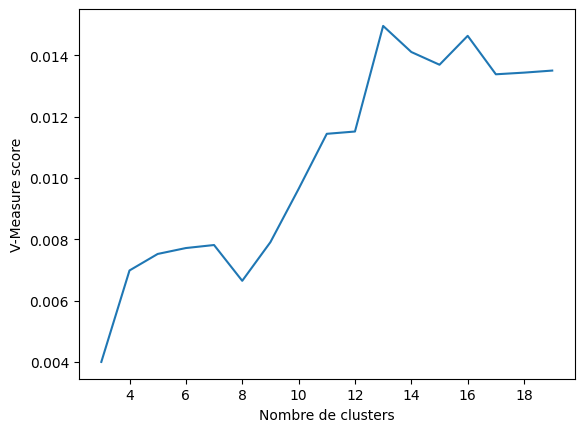

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score

v_scores = []
for k in range(3, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X)
    v_scores.append(v_measure_score(data_target, labels))

# Tracer la courbe de V-Measure score
plt.plot(range(3, 20), v_scores)
plt.xlabel('Nombre de clusters')
plt.ylabel('V-Measure score')
plt.show()

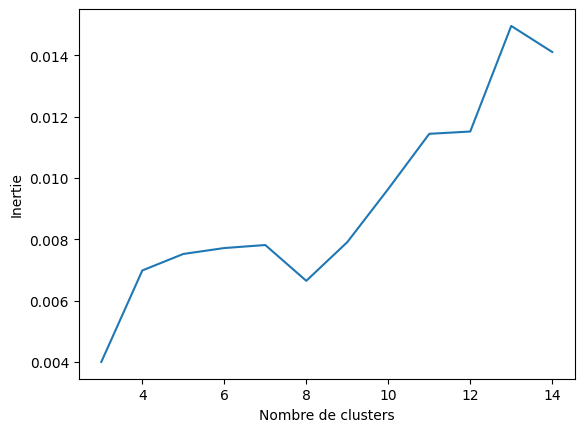

In [ ]:
# Tracer la courbe du v_measure_score
import matplotlib.pyplot as plt
plt.plot(range(3, 15), v_scores[0:12])
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

In [ ]:
# Conclusion : le v_measure_score est le plus élevé pour 13 clusters

#### Essai avec 13 clusters

##### Visualisation graphique (13 clusters)

In [ ]:
#Application du PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
#Application de KMeans
kmeans_pca = KMeans(n_clusters=13, random_state=42, n_init='auto')
kmeans_pca.fit(X_pca)
kmeans_pca_pred = kmeans_pca.predict(X_pca)

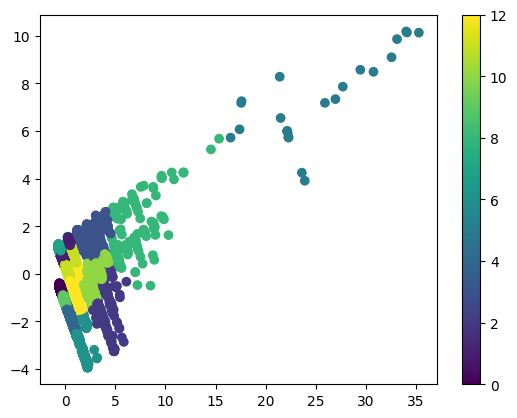

In [ ]:
import matplotlib
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pca_pred)
plt.colorbar()

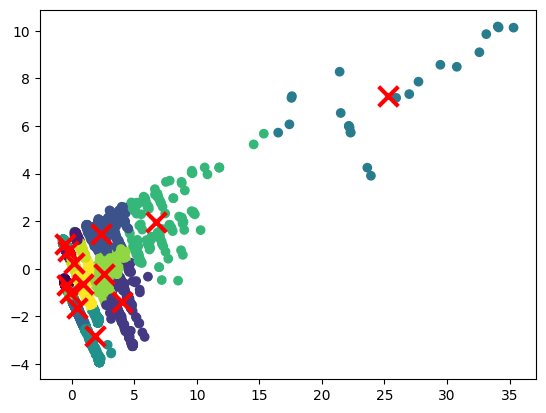

In [ ]:
#Affichage des centroides des clusters

# Obtenir les prédictions de cluster
labels = kmeans_pca.labels_

# Obtenir les coordonnées des centres de chaque cluster
centers = kmeans_pca.cluster_centers_

# Tracer les points et les centres des clusters sur un graphique
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()

In [ ]:
centers

array([[-0.41032859, -0.69904075],
       [-0.27014365,  0.7510655 ],
       [ 4.04361482, -1.41252208],
       [ 2.34256434,  1.47848405],
       [ 0.39667088, -1.65425875],
       [25.2508783 ,  7.28291441],
       [ 1.84759667, -2.83933627],
       [-0.55368755,  1.03148446],
       [ 6.76875997,  1.95763569],
       [-0.14509529, -1.02765661],
       [ 2.58647711, -0.22182988],
       [ 0.19200486,  0.24533532],
       [ 0.92303943, -0.6485996 ]])

##### Analyse (13 clusters)

In [ ]:
#Application de KMeans
kmeans = KMeans(n_clusters=13, random_state=42, n_init='auto')
kmeans.fit(X)
kmeans_pred = kmeans.predict(X)

In [ ]:
#Données qui contiennent la prediction dans quel cluster se trouve chaque ligne
pred_clusters_13 = kmeans.labels_

In [ ]:
# Transformation des predictions en dataframe Pandas
col_pred_13 = pd.DataFrame(pred_clusters_13, columns=['prediction'])

In [ ]:
# Concaténation des données brutes et des predictions
data_pred_13 = pd.concat([data_selection.reset_index(drop=True), col_pred_13], axis=1)

In [ ]:
data_pred_13

,is_pro,acquisition_id,work_type_id,volume,handling,is_finished,plant_id,previous_bill_count,client_maturity,prediction
0,0,f91db25c-53b0-4993-94e4-8704b4981c77,e00cd633-2fac-4733-ad1d-50e0a2ac0e78,2.5,1,0,ed4ec1c3-683b-455e-a085-c4e45f2f0ada,0,90D,8
1,0,f91db25c-53b0-4993-94e4-8704b4981c77,de6dba1f-936e-47aa-9f93-03f5ee76f3b1,15.0,1,0,5e101746-6975-446c-93c2-b363e9421ce4,0,30D,11
2,0,f6851d59-f035-4199-9b9e-aba4d33d6995,de6dba1f-936e-47aa-9f93-03f5ee76f3b1,6.0,0,1,a13601cc-8c4b-4f31-9f9b-45913b7fe4d9,0,30D,6
3,0,f91db25c-53b0-4993-94e4-8704b4981c77,e00cd633-2fac-4733-ad1d-50e0a2ac0e78,4.5,0,0,ed4ec1c3-683b-455e-a085-c4e45f2f0ada,0,15D,4
4,0,f91db25c-53b0-4993-94e4-8704b4981c77,b3716372-9e82-4a07-802f-6bb67ef57e23,7.5,0,1,c15debea-1674-4f7f-9ffa-7a3510434e02,0,48H,12
...,...,...,...,...,...,...,...,...,...,...
53322,0,f91db25c-53b0-4993-94e4-8704b4981c77,b3716372-9e82-4a07-802f-6bb67ef57e23,6.0,1,0,9f112b10-6c24-4aca-9c01-dfaa59664b48,0,48H,8
53323,0,f91db25c-53b0-4993-94e4-8704b4981c77,bfaa865c-602d-49b5-8754-a48c67649b5c,6.0,0,0,f02f4e0f-f963-4ea6-9dfb-7cec98d8bbe2,0,30D,6
53324,0,f91db25c-53b0-4993-94e4-8704b4981c77,b3716372-9e82-4a07-802f-6bb67ef57e23,5.0,0,0,57f96607-5fd7-436f-97bf-39dda209fe00,0,90D,3
53325,0,f91db25c-53b0-4993-94e4-8704b4981c77,e00cd633-2fac-4733-ad1d-50e0a2ac0e78,6.5,0,0,777f596a-fe66-4593-8ac5-65c45b1f9eda,0,30D,6


In [ ]:
# Répartition de la colonne prediction
data_pred_13['prediction'].value_counts()

8     14583
6      7300
0      7116
4      6315
12     3963
3      3662
2      3559
11     2763
1      2538
7       934
10      406
9       165
5        23
Name: prediction, dtype: int64

In [ ]:
data_pred_13.groupby('prediction')['is_pro'].value_counts()

prediction  is_pro
0           0          7116
1           0          2538
2           1          3559
3           0          3662
4           0          6315
5           1            23
6           0          7300
7           0           793
            1           141
8           0         14583
9           1           140
            0            25
10          0           406
11          0          2763
12          0          3963
Name: is_pro, dtype: int64

In [ ]:
data_pred_13.groupby('prediction')['acquisition_id'].value_counts()

prediction  acquisition_id                      
0           f91db25c-53b0-4993-94e4-8704b4981c77    6687
            eb1fe89c-aeb1-455a-8714-0457171f40e3     151
            ce62a7a8-751d-4f63-ba79-b9b1e600b160      68
            fb378985-6eac-42dc-88ff-049b8af67f2a      68
            a4467a36-88f3-467c-bf51-0f95d95e6323      38
                                                    ... 
12          49556876-ab90-4aad-9e21-66a10e0ff806       5
            b0ba32fd-c6d2-4220-9e80-f0229f748fee       4
            1e698fc9-ce05-45b0-b413-a6c46a077432       2
            58f4e9c3-7312-4351-b568-88beabbccd0a       2
            3731307b-2580-4fb4-b1e1-9ef8e49e04e2       1
Name: acquisition_id, Length: 185, dtype: int64

In [ ]:
data_pred_13.groupby('prediction')['work_type_id'].value_counts()

prediction  work_type_id                        
0           b3716372-9e82-4a07-802f-6bb67ef57e23    2445
            e00cd633-2fac-4733-ad1d-50e0a2ac0e78     911
            de6dba1f-936e-47aa-9f93-03f5ee76f3b1     833
            cb13f370-2b24-4726-9732-5aef675ab662     750
            0bb58cb7-4748-47c6-a829-a73cd7f948ff     499
                                                    ... 
12          86a51ce3-260d-4531-894c-ecec6a3cb6ac      10
            543974f6-1ae3-4985-9afa-a56b10443422       6
            9c00b7b8-4cdb-42f5-9570-1d90e423842e       6
            29bdaada-9244-4615-8925-ce6f6bca2f7f       4
            f58e081d-234e-446c-a971-49408a3a7ab6       3
Name: work_type_id, Length: 268, dtype: int64

In [ ]:
data_pred_13.groupby('prediction')['volume'].value_counts()

prediction  volume
0           5.00      706
            4.00      624
            3.00      604
            6.00      601
            7.00      442
                     ... 
12          8.35        1
            11.25       1
            11.75       1
            14.50       1
            15.75       1
Name: volume, Length: 1142, dtype: int64

In [ ]:
data_pred_13.groupby('prediction')['handling'].value_counts()

prediction  handling
0           1            7116
1           0            2538
2           0            1943
            1            1616
3           0            3662
4           0            6315
5           1              18
            0               5
6           0            7300
7           0             532
            1             402
8           1           14583
9           1              83
            0              82
10          0             209
            1             197
11          1            1648
            0            1115
12          0            3963
Name: handling, dtype: int64

In [ ]:
data_pred_13.groupby('prediction')['plant_id'].value_counts()

prediction  plant_id                            
0           6a00cff3-a509-4b14-a201-7cb76d99f5ee    369
            4808fc42-3c69-4bc5-a44f-52ec177eedb1    167
            3aefea71-3086-4c2e-a13c-23f88b7b6a4c    152
            b6700b02-ba65-46df-8b82-1cd46009285f    148
            610d2b0c-cdaf-4f02-bc54-6542e1e37771    146
                                                   ... 
12          daa87949-d925-4760-99e8-d84a1ecf4f19      1
            de04d533-7983-4399-9af1-4c1e97a78892      1
            e5aade4c-213d-42c3-b987-1d8f96e6ec65      1
            ef798083-be02-4627-ae61-dd0c3bf55a4d      1
            fc55f78e-a02e-466c-9be0-db9e8f7d1058      1
Name: plant_id, Length: 3623, dtype: int64

In [ ]:
data_pred_13.groupby('prediction')['previous_bill_count'].value_counts()

prediction  previous_bill_count
0           0                       6866
            1                        250
1           0                       2466
            1                         72
2           0                       3173
            1                        288
            2                         98
3           0                       3583
            1                         79
4           0                       6111
            1                        204
5           21                         9
            17                         2
            34                         2
            15                         1
            16                         1
            25                         1
            26                         1
            27                         1
            29                         1
            30                         1
            32                         1
            33                         1
            35           

In [ ]:
data_pred_13.groupby('prediction')['client_maturity'].value_counts()

prediction  client_maturity
0           15D                7116
1           15D                1933
            NC                  458
            >90D                147
2           15D                1260
            48H                 966
            30D                 616
            90D                 380
            NC                  233
            >90D                104
3           90D                3662
4           15D                6315
5           48H                  13
            15D                   8
            30D                   2
6           30D                5356
            NC                 1460
            >90D                484
7           90D                 224
            30D                 203
            15D                 171
            NC                  155
            48H                 106
            >90D                 75
8           30D                5578
            90D                3847
            48H                2599


##### Conclusion

In [ ]:
# TODO

### Test Agglomerative Clustering

In [ ]:
#Evaluation du clustering avec critère d'aggrégation ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

wardAgglo_scores = []
for k in range(3, 10):
    clustering_ward = AgglomerativeClustering(n_clusters=k, linkage='ward').fit_predict(X)
    wardAgglo_scores.append(silhouette_score(X, clustering_ward))

# Tracer la courbe de silhouette score
plt.plot(range(3, 10), wardAgglo_scores)
plt.xlabel('Nombre de clusters')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
clustering_ward = AgglomerativeClustering(n_clusters=8, linkage='ward').fit_predict(X)
score = silhouette_score(X, clustering_ward)
print(score)

In [ ]:
#Evaluation du clustering avec critère d'aggrégation average
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

averageAgglo_scores = []
for k in range(3, 10):
    clustering_average = AgglomerativeClustering(n_clusters=k, linkage='average').fit_predict(X)
    averageAgglo_scores.append(silhouette_score(X, clustering_average))

# Tracer la courbe de silhouette score
plt.plot(range(3, 10), averageAgglo_scores)
plt.xlabel('Nombre de clusters')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
clustering_average = AgglomerativeClustering(n_clusters=8, linkage='average').fit_predict(X)
score = silhouette_score(X, clustering_average)
print(score)

NameError: ignored